$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [ ]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [ ]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [ ]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [ ]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [ ]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [ ]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

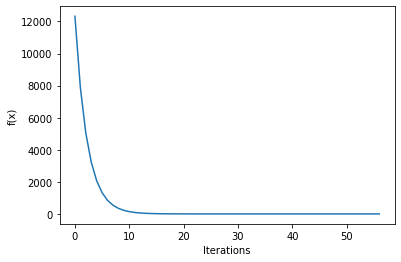

In [ ]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

## 2)

Minimizer is (-99.999,24.999) (can be rounded to (-100,25) which is the analytical solution).\
Minimum function value is $1.7*10^{-7}$ (rounded to 0 which is the analytical solution).

In [ ]:
def minimizer2(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
  return x, fvals,k 

In [ ]:
iters = []
for i in range(1,11):
  opt_x, fvals_ret,k = minimizer2(np.array([10,10]), 10**(-i), 0.1)
  iters.append(k)
  print('iters:',k, ' x:', opt_x, ' f(x):', evalf(opt_x))

iters: 35  x: [-99.9553787   24.99391528]  f(x): 0.0020280843668995063
iters: 45  x: [-99.99520882  24.99934666]  f(x): 2.3382220797474075e-05
iters: 56  x: [-99.99958844  24.99994388]  f(x): 1.7253033717248775e-07
iters: 66  x: [-99.99995581  24.99999397]  f(x): 1.989139359193299e-09
iters: 76  x: [-99.99999526  24.99999935]  f(x): 2.293321544605827e-11
iters: 87  x: [-99.99999959  24.99999994]  f(x): 1.6921726745458407e-13
iters: 97  x: [-99.99999996  24.99999999]  f(x): 1.950942200128245e-15
iters: 107  x: [-100.   25.]  f(x): 2.249273021138356e-17
iters: 118  x: [-100.   25.]  f(x): 1.6597088735501767e-19
iters: 128  x: [-100.   25.]  f(x): 1.9135732950098918e-21


### 3)

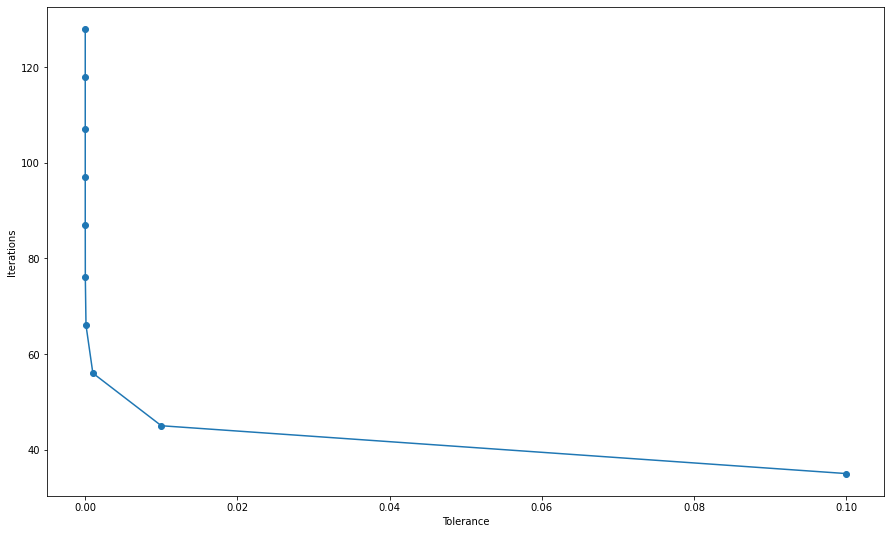

In [ ]:
plt.figure(figsize=(15,9))
plt.plot([10**(-i) for i in range(1,11)],iters,marker='o')
plt.ylabel('Iterations')
plt.xlabel('Tolerance')
plt.show()

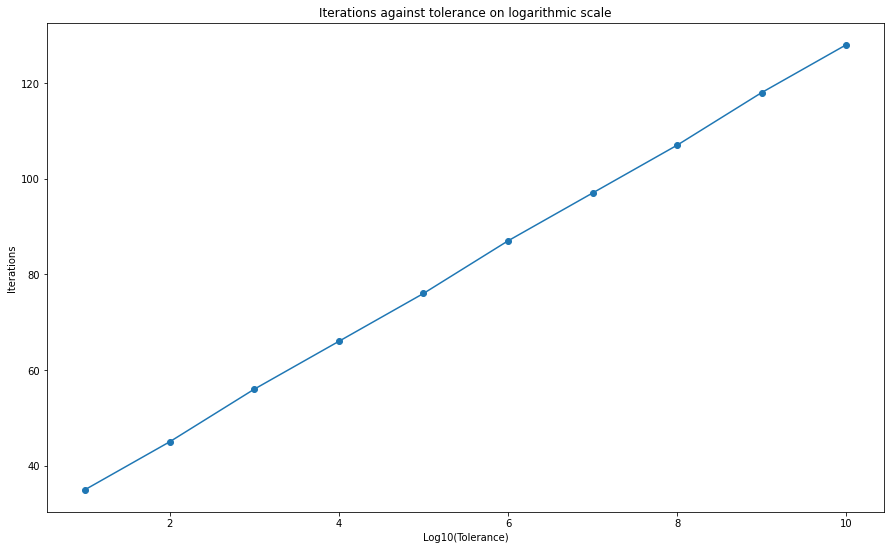

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(range(1,11),iters,marker='o')
plt.ylabel('Iterations')
plt.xlabel('-Log10(Tolerance)')
plt.title('Iterations against tolerance on logarithmic scale')
plt.show()

As expected, lower the tolerance more iterations are required. In fact, number of iterations is proportional to log of tolerance.

The minimizer is also a bit more accurate as tolerance decreases. However, after a certain limit of tolerance, we get the same minimizer value despite increasing the number of iterations due to reaching precision limit of float. (when the value of gradient is very close to 0). In this case limit was $10^{-8}$

In [ ]:
iters2 = []
for i in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  opt_x, fvals_ret,k = minimizer2(np.array([10,10]), 10**(-5), i)
  iters2.append(k)
  print('iters:',k, ' x:', opt_x, ' f(x):', evalf(opt_x))

iters: 84571  x: [-99.99999505  24.99999932]  f(x): 2.49936770204995e-11
iters: 8450  x: [-99.99999505  24.99999933]  f(x): 2.494219709847674e-11
iters: 838  x: [-99.99999512  24.99999933]  f(x): 2.4304673044883465e-11
iters: 76  x: [-99.99999526  24.99999935]  f(x): 2.293321544605827e-11
iters: 34  x: [-99.99999685  24.99999957]  f(x): 1.011747066175869e-11
iters: 11  x: [-99.99999775  24.99999969]  f(x): 5.169479687800271e-12
iters: 1  x: [-100.   25.]  f(x): 0.0
iters: 11  x: [-100.00000225   25.00000031]  f(x): 5.169479687800271e-12
iters: 19  x: [-100.00000302   25.00000041]  f(x): 9.312506683476372e-12
iters: 34  x: [-99.99999685  24.99999957]  f(x): 1.011747066175869e-11
iters: 76  x: [-99.99999526  24.99999935]  f(x): 2.293321544605827e-11


## 4)

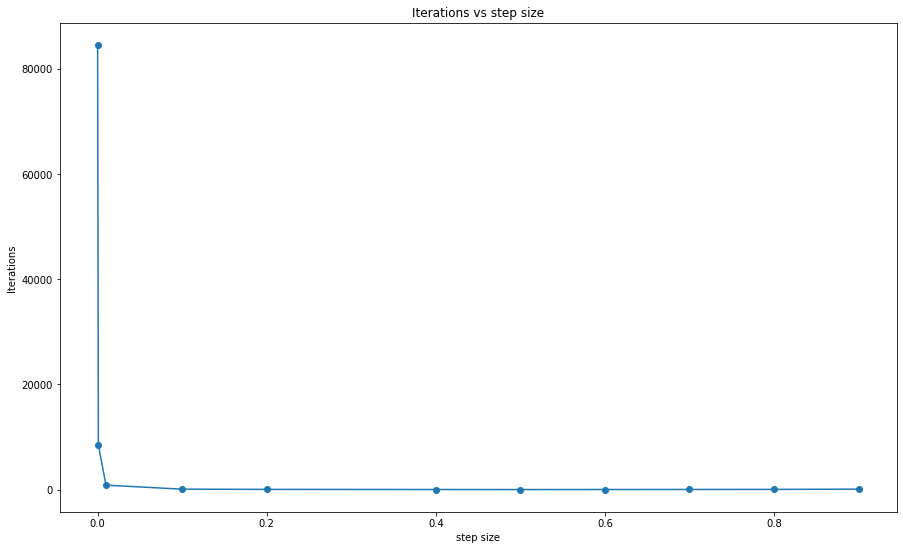

In [ ]:
plt.figure(figsize=(15,9))
plt.plot([0.0001,0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],iters2,marker='o')
plt.ylabel('Iterations')
plt.xlabel('step size')
plt.title('Iterations vs step size')
plt.show()

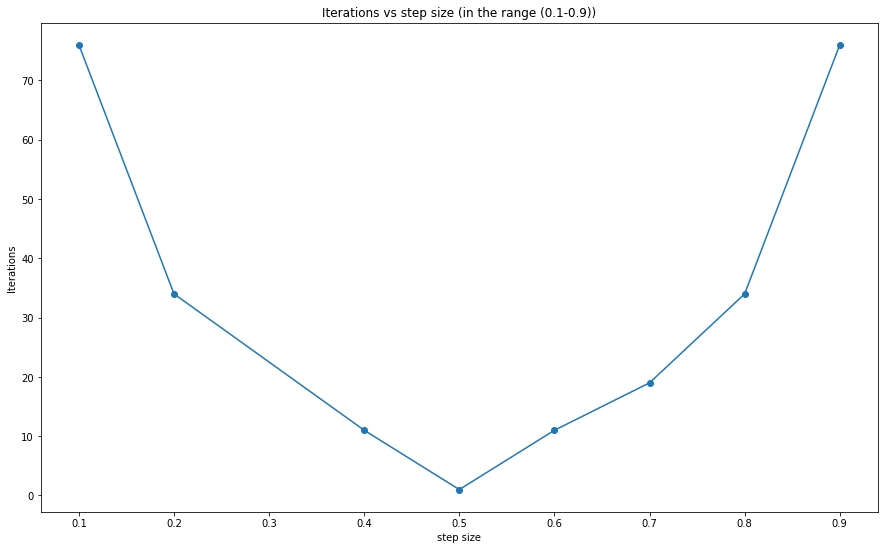

In [ ]:
plt.figure(figsize=(15,9))
plt.plot([0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],iters2[3:],marker='o')
plt.ylabel('Iterations')
plt.xlabel('step size')
plt.title('Iterations vs step size (in the range (0.1-0.9))')
plt.show()

When the step size is very small, the number of iterations required are extremely large. Values above and around 0.01 seem to be appropriate. Number of iterations start decreasing as step size increases, since we cover more distance in each step. However, it starts increasing after a certain value (0.5 in this case). This can happen due to taking a large step near the minima, and overshooting it (as can be seen for step size 0.6 and 0.7). Then we oscillate around it a few times causing increase in iterations. Thus, too large a step size can also cause divergence. The accuracy of the function values follows is surprisingly the highest in the implementations with the lowest number of iterations. Error is almost same for all values below 0.01

## 5)

In [ ]:
iters3 = []
X = [np.array(j) for j in [[10000, 10000],[500, 0],[0, 1000],[1, 1],[-500, -2]]]
for i in X:
  opt_x, fvals_ret,k = minimizer2(i, 10**(-5), 0.1)
  iters3.append(k)
  print('iters:',k, ' x:', opt_x, ' f(x):', evalf(opt_x))

iters: 98  x: [-99.99999679  25.00000317]  f(x): 2.0414342669998657e-11
iters: 84  x: [-99.99999566  24.99999982]  f(x): 1.888746375147865e-11
iters: 86  x: [-99.99999954  25.00000452]  f(x): 2.060780080476227e-11
iters: 76  x: [-99.99999564  24.99999896]  f(x): 2.0052840841640608e-11
iters: 82  x: [-100.00000452   24.99999969]  f(x): 2.055190630073527e-11


\begin{array}{c|c|c}
minimizer&\text{objective value}&\text{number of iterations}\\
\hline
[-99.9999679,25.00000317] & 2.041*10^{-11}&98\\
[-99.99999566,  24.99999982] & 1.88*10^{-11}&84\\
[-99.99999954,  25.00000452] & 2.06*10^{-11}&86\\
[-99.99999564,  24.99999896] &2.005*10^{-11}&76\\
[-100.00000452,   24.99999969]& f(x): 2.055*10^{-11}&82\\
\end{array}

There is a slight increase in the number of iterations required as distance of starting point from true value increases, but this change is not proportional (linear). This is because , even if we start far away, most probably we will take larger steps, since value of gradient will also be large. This may not be the case in higher order polynomials since derivative can be 0 in multiple locations.